<a href="https://colab.research.google.com/github/mugekuskon/HeartDiseasePrediction/blob/main/CS512_Project_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
from time import time

import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use('default')

data = pd.read_csv('/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
sorted_data = data.sort_values(by=["HeartDisease"])


In [ ]:
print("Shape is: ", sorted_data.shape)

Shape is:  (918, 12)


In [ ]:
sorted_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
sorted_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## **Handling Missing Values.**

In [ ]:
sorted_data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#checking the missing values again.
sorted_data.isna().any()


Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
sorted_data['Cholesterol']=sorted_data['Cholesterol'].replace(0,sorted_data['Cholesterol'].median())
sorted_data['RestingBP']=sorted_data['RestingBP'].replace(0,sorted_data['RestingBP'].median())
print(sorted_data["Cholesterol"].median() )
print(sorted_data["RestingBP"].median() )

223.0
130.0


In [ ]:
sorted_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,240.581699,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.982967,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## **Checking Imbalance / Counting Values.**

In [ ]:
sorted_data.value_counts(["HeartDisease"])

HeartDisease
1               508
0               410
dtype: int64

In [ ]:
sorted_data.value_counts(["ChestPainType"])

ChestPainType
ASY              496
NAP              203
ATA              173
TA                46
dtype: int64

In [ ]:
sorted_data.value_counts(["FastingBS"])

FastingBS
0            704
1            214
dtype: int64

In [ ]:
sorted_data.value_counts(["RestingECG"])

RestingECG
Normal        552
LVH           188
ST            178
dtype: int64

In [ ]:
sorted_data.value_counts(["ExerciseAngina"])

ExerciseAngina
N                 547
Y                 371
dtype: int64

In [ ]:
sorted_data.value_counts(["ST_Slope"])

ST_Slope
Flat        460
Up          395
Down         63
dtype: int64

## **Encoding the categorical data.**

In [ ]:


labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
sorted_data['ChestPainType'] = labelencoder.fit_transform(sorted_data['ChestPainType'])
sorted_data

#ChestPainType:
#ASY:0
#ATA:1
#NAP:2
#TA:3

#Deleting a column : sorted_data.drop('ChestPainTypeLabeled', axis=1, inplace=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,Normal,172,N,0.0,Up,0
620,65,M,0,120,177,0,Normal,140,N,0.4,Up,0
619,74,F,1,120,269,0,LVH,121,Y,0.2,Up,0
618,64,M,0,128,263,0,Normal,105,Y,0.2,Flat,0
616,67,F,2,115,564,0,LVH,160,N,1.6,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,49,M,3,130,223,0,ST,145,N,3.0,Flat,1
493,51,M,2,137,339,0,Normal,127,Y,1.7,Flat,1
494,60,M,0,142,216,0,Normal,110,Y,2.5,Flat,1
485,63,M,1,139,217,1,ST,128,Y,1.2,Flat,1


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column.
sorted_data['RestingECG'] = labelencoder.fit_transform(sorted_data['RestingECG'])
sorted_data

#RestingECG:
#Normal:1
#LVH:0
#ST:2


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,N,0.0,Up,0
620,65,M,0,120,177,0,1,140,N,0.4,Up,0
619,74,F,1,120,269,0,0,121,Y,0.2,Up,0
618,64,M,0,128,263,0,1,105,Y,0.2,Flat,0
616,67,F,2,115,564,0,0,160,N,1.6,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,49,M,3,130,223,0,2,145,N,3.0,Flat,1
493,51,M,2,137,339,0,1,127,Y,1.7,Flat,1
494,60,M,0,142,216,0,1,110,Y,2.5,Flat,1
485,63,M,1,139,217,1,2,128,Y,1.2,Flat,1


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
sorted_data['ExerciseAngina'] = labelencoder.fit_transform(sorted_data['ExerciseAngina'])
sorted_data

#ExerciseAngina:
#N:0
#Y:1



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,0,0.0,Up,0
620,65,M,0,120,177,0,1,140,0,0.4,Up,0
619,74,F,1,120,269,0,0,121,1,0.2,Up,0
618,64,M,0,128,263,0,1,105,1,0.2,Flat,0
616,67,F,2,115,564,0,0,160,0,1.6,Flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,49,M,3,130,223,0,2,145,0,3.0,Flat,1
493,51,M,2,137,339,0,1,127,1,1.7,Flat,1
494,60,M,0,142,216,0,1,110,1,2.5,Flat,1
485,63,M,1,139,217,1,2,128,1,1.2,Flat,1


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
sorted_data['ST_Slope'] = labelencoder.fit_transform(sorted_data['ST_Slope'])
sorted_data

#ST_Slope:
#Up:2
#Flat:1
#Down:0 ??? check et ? 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289,0,1,172,0,0.0,2,0
620,65,M,0,120,177,0,1,140,0,0.4,2,0
619,74,F,1,120,269,0,0,121,1,0.2,2,0
618,64,M,0,128,263,0,1,105,1,0.2,1,0
616,67,F,2,115,564,0,0,160,0,1.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,49,M,3,130,223,0,2,145,0,3.0,1,1
493,51,M,2,137,339,0,1,127,1,1.7,1,1
494,60,M,0,142,216,0,1,110,1,2.5,1,1
485,63,M,1,139,217,1,2,128,1,1.2,1,1


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
sorted_data['Sex'] = labelencoder.fit_transform(sorted_data['Sex'])
sorted_data

#Sex:
#M:1
#F:0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
620,65,1,0,120,177,0,1,140,0,0.4,2,0
619,74,0,1,120,269,0,0,121,1,0.2,2,0
618,64,1,0,128,263,0,1,105,1,0.2,1,0
616,67,0,2,115,564,0,0,160,0,1.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
492,49,1,3,130,223,0,2,145,0,3.0,1,1
493,51,1,2,137,339,0,1,127,1,1.7,1,1
494,60,1,0,142,216,0,1,110,1,2.5,1,1
485,63,1,1,139,217,1,2,128,1,1.2,1,1


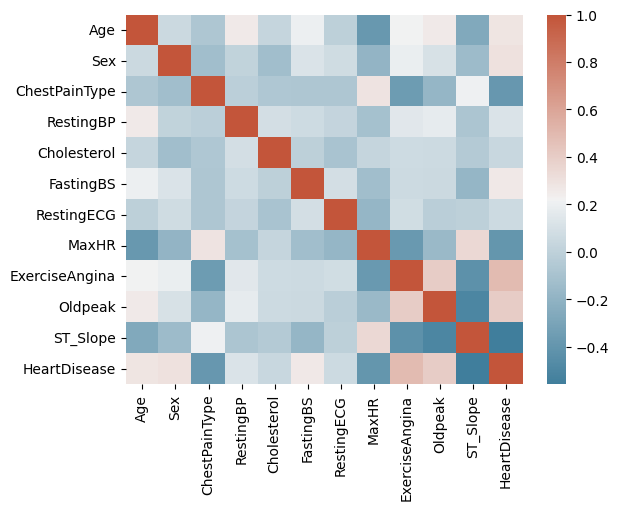

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(sorted_data.corr(),  cmap=cmap)


In [ ]:
# sorted_data.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))  #Outlier Detection

## **Splitting the data**

In [ ]:
AlgorithmsScores = {} #will record all useful scores for all used algorithms.

In [ ]:
features_sorted_data = sorted_data.drop(["HeartDisease"],axis='columns')

X = features_sorted_data #Features
y = sorted_data['HeartDisease'] #Target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 7)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,1,0,140,223,1,1,157,1,2.0,1
555,58,1,2,150,219,0,2,118,1,0.0,1
695,58,1,0,146,218,0,1,105,0,2.0,1
64,50,0,1,110,202,0,1,145,0,0.0,2
364,56,1,2,120,223,0,1,97,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
765,41,1,2,112,250,0,1,179,0,0.0,2
514,43,1,0,122,223,0,1,120,0,0.5,2
296,50,1,0,145,223,1,1,139,1,0.7,1
846,39,1,0,118,219,0,1,140,0,1.2,1


In [ ]:
# Shape of Train Data
print("Shape of the training data: ", X_train.shape[0])

# Class distribution in Train Data
print("Number of negative samples in training: ", y_train[y_train == 0].shape[0])
print("Number of positive samples in training: ", y_train[y_train == 1].shape[0])

Shape of the training data:  642
Number of negative samples in training:  287
Number of positive samples in training:  355


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
378,70,1,0,140,223,1,1,157,1,2.0,1,1
555,58,1,2,150,219,0,2,118,1,0.0,1,1
695,58,1,0,146,218,0,1,105,0,2.0,1,1
64,50,0,1,110,202,0,1,145,0,0.0,2,0
364,56,1,2,120,223,0,1,97,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
765,41,1,2,112,250,0,1,179,0,0.0,2,0
514,43,1,0,122,223,0,1,120,0,0.5,2,1
296,50,1,0,145,223,1,1,139,1,0.7,1,1
846,39,1,0,118,219,0,1,140,0,1.2,1,1


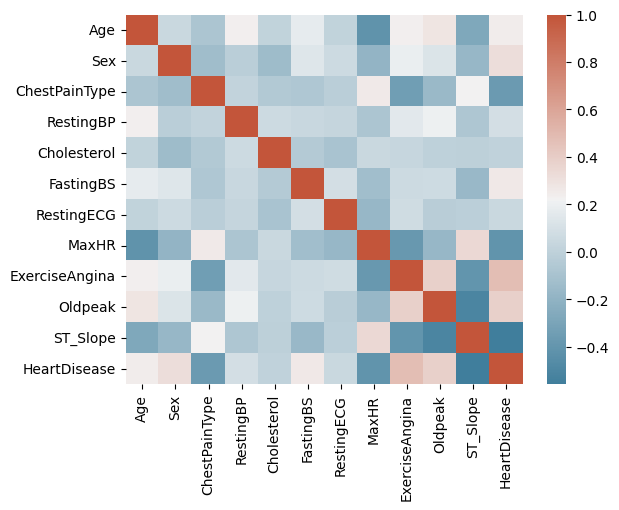

In [ ]:
y = pd.DataFrame(y_train)
t = pd.concat([X_train,y], axis=1)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(t.corr(),  cmap=cmap)


# **Models**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

## **Logistic Regression**

In [ ]:
#Standardizing the data

#Training data
X_train_log = X_train.copy()
scaler = StandardScaler()
X_train_log[X_train_log.columns] = scaler.fit_transform(X_train_log[X_train_log.columns].to_numpy())

#Testing data
X_test_log = X_test.copy()
scaler = StandardScaler()
X_test_log[X_test_log.columns] = scaler.fit_transform(X_test_log[X_test_log.columns].to_numpy())

In [ ]:
lr = LogisticRegression()
clf = lr.fit(X_train_log, y_train)
y_pred = clf.predict(X_test_log)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test_log, y_test)))
print('')
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision:{:.3f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_pred)))
print('')
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.86

Accuracy: 0.859
Precision:0.896
Recall: 0.843

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       123
           1       0.90      0.84      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



Text(0.5, 427.9555555555555, 'Predicted label')

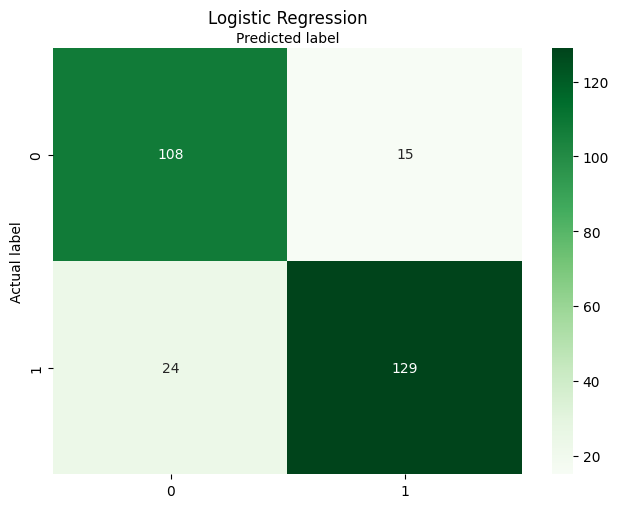

In [ ]:
#Inspecting the confusion matrix.

initial_logreg_cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Creating heatmap.

sns.heatmap(pd.DataFrame(initial_logreg_cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#71 - 11
#16 - 86

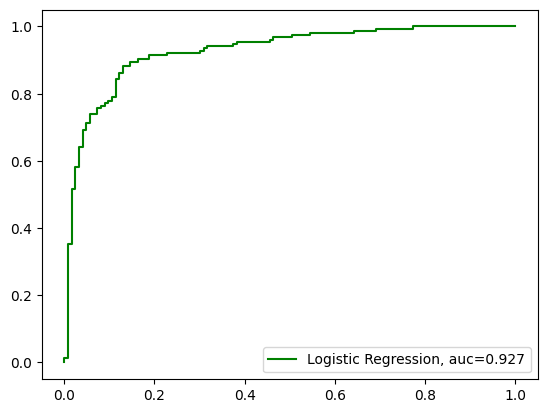

In [ ]:
# Compute ROC curve and AUC.

y_pred_prob_lr = clf.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_lr)
logistic_auc = metrics.roc_auc_score(y_test, y_pred_prob_lr)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str( "{:.3f}".format(logistic_auc)), color='green')
plt.legend(loc=4)
plt.show()



In [ ]:
#HyperParameter Tuning: Maximum iteration, C value, the penalty (regularization) and the solver are being tested.
                        #For C values:  smaller values specify stronger regularization.
                        #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
                        #Not used all solver since not compatible with other penalty etc.

parameters ={"max_iter": [20,40,100, 200, 500,1000], "C":[0.01, 0.1,0.5,0.8,0.9, 1,1.1,1.2,1.5,2],'penalty':['l2'], 'solver':[ 'lbfgs','liblinear']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=5, verbose = True) #5 fold cross validation.
logreg_cv.fit(X_train_log,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 2],
                         'max_iter': [20, 40, 100, 200, 500, 1000],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             verbose=True)

In [ ]:
print("Best: %f using %s" % (logreg_cv.best_score_, logreg_cv.best_params_))
means = logreg_cv.cv_results_['mean_test_score']
stds = logreg_cv.cv_results_['std_test_score']
params = logreg_cv.cv_results_['params']

#Debugging purposes

# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev,  param))

Best: 0.839656 using {'C': 0.8, 'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear'}


F1 score:  0.8590482833449586
Accuracy:  0.8586956521739131
Recall:  0.8431372549019608
Precision:  0.8958333333333334
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       123
           1       0.90      0.84      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276





Text(0.5, 427.9555555555555, 'Predicted label')

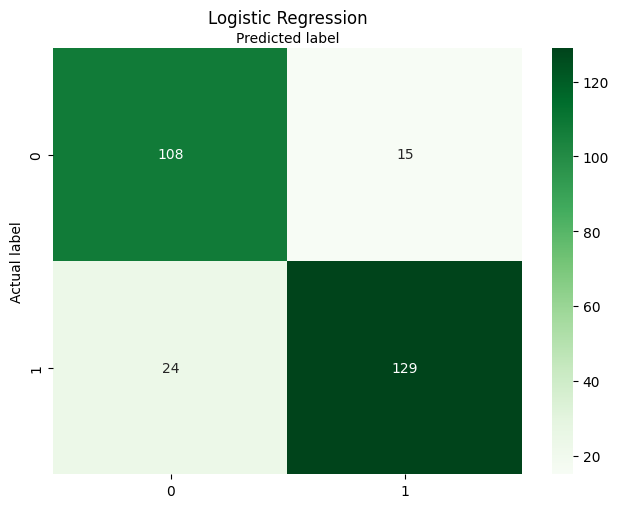

In [ ]:
#Testing Phase:

# print(logreg_cv.best_estimator_)

logreg_cv = logreg_cv.best_estimator_
logreg_cv = logreg_cv.fit(X_train_log, y_train)
y_pred = logreg_cv.predict(X_test_log)


grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)


#Calculating various scores.
logisticRegression_f1 = f1_score(y_test,y_pred,average="weighted")
logisticRegression_accuracy = logreg_cv.score(X_test_log,y_test)
logisticRegression_recall = recall_score(y_test,y_pred,average="binary")
logisticRegression_precision = precision_score(y_test,y_pred,average="binary")

print("F1 score: ", logisticRegression_f1)
print("Accuracy: ",logisticRegression_accuracy)
print("Recall: ",logisticRegression_recall )
print("Precision: ",logisticRegression_precision)
print(classification_report(y_test,y_pred))

print('')

#Investigate Confusion Matrix.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] #name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
print('')
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') #decrease error from 11 to 10, 16 to 15.



# Old cm: 71-11
          #16-86

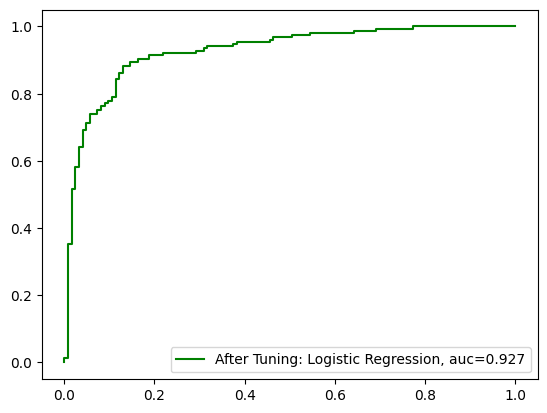

In [ ]:
# Compute ROC curve and ROC area for each class

#After tuning:
y_pred_prob_lr_cv = logreg_cv.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_lr_cv)
logisticRegression_auc = metrics.roc_auc_score(y_test, y_pred_prob_lr_cv)

plt.plot(fpr,tpr,label="After Tuning: Logistic Regression, auc="+str( "{:.3f}".format(logisticRegression_auc)), color='green')
plt.legend(loc=4)

plt.show()



In [ ]:
#F1, Acc, Recall, Precision, AUC.
AlgorithmsScores["LR"] = [format(logisticRegression_f1, '.3f'), "{:.3f}".format(logisticRegression_accuracy), "{:.3f}".format(logisticRegression_recall), "{:.3f}".format(logisticRegression_precision), "{:.3f}".format(logisticRegression_auc)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.927'],
 'LightGBM': ['0.906', '0.899', '0.882', '0.931', '0.942'],
 'MLP': ['0.846', '0.841', '0.791', '0.910', '0.923'],
 'Random Forest': ['0.877', '0.877', '0.856', '0.916', '0.932'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921'],
 'XGBoost': ['0.895', '0.895', '0.876', '0.931', '0.944']}


## **Naive Bayes**

In [ ]:
scaler = MinMaxScaler() # define scaler
training_time = np.zeros(5) # traning time array
accuracy = np.zeros(5) # accuracy array 
prec = np.zeros(5) # precision array
recall = np.zeros(5) # recall array
######################################################## Gaussian NB
x_nb_train = X_train
y_nb_train = y_train

model_gaussian = GaussianNB() # defining Gaussian NB
t0 = time()
model_gaussian.fit(x_nb_train, y_nb_train) # train the model with train data
training_time[0] = time() - t0

x_nb_test = X_test
x_features = model_gaussian.feature_names_in_
y_nb_test = y_test

y_pred = model_gaussian.predict(x_nb_test)
# get feature importances
imps_gaus = permutation_importance(model_gaussian, x_nb_test, y_nb_test)
importances_gaus = imps_gaus.importances_mean
std_gaus = imps_gaus.importances_std
indices_gaus = np.argsort(importances_gaus)[::-1]

y_pred_prob = model_gaussian.predict_proba(x_nb_test)[::,1] 
fpr_gaus, tpr_gaus, _ = metrics.roc_curve(y_test,  y_pred_prob) # roc curve
f1_gaus = f1_score(y_test,y_pred,average="weighted")
auc_gaus = metrics.roc_auc_score(y_test, y_pred_prob)

prec[0] = metrics.precision_score(y_test, y_pred)
recall[0] = metrics.recall_score(y_test, y_pred)
cnf_matrix_gaus = metrics.confusion_matrix(y_test, y_pred)

accuracy[0] = round(100*model_gaussian.score(x_nb_test, y_nb_test),2)

print("The accuracy of the trained Gaussian NB model: %",accuracy[0])
print("The precision of the trained Gaussian NB model: %",round(prec[0]*100,2))
print("The recall of the trained Gaussian NB model: %",round(recall[0]*100,2))
print("")
######################################################## Multinomial NB
x_nb_train = X_train
y_nb_train = y_train
x_nb_train = scaler.fit_transform(x_nb_train)

model_no_laplace = MultinomialNB(alpha=0.001) # defining multinominal NB with no Laplacian smoothing
t0 = time()
model_no_laplace.fit(x_nb_train, y_nb_train) # train the model with train data
training_time[1] = time() - t0

x_nb_test = X_test
y_nb_test = y_test
x_nb_test = scaler.fit_transform(x_nb_test)

y_pred = model_no_laplace.predict(x_nb_test)
# get feature importances
imps_mnb_nl = permutation_importance(model_no_laplace, x_nb_test, y_nb_test)
importances_mnb_nl = imps_mnb_nl.importances_mean
std_mnb_nl = imps_mnb_nl.importances_std
indices_mnb_nl = np.argsort(importances_mnb_nl)[::-1]

y_pred_prob = model_no_laplace.predict_proba(x_nb_test)[::,1] 
fpr_mnb_nl, tpr_mnb_nl, _ = metrics.roc_curve(y_test,  y_pred_prob) # roc curve
f1_mnb_nl = f1_score(y_test,y_pred,average="weighted")
auc_mnb_nl = metrics.roc_auc_score(y_test, y_pred_prob)

prec[1] = metrics.precision_score(y_test, y_pred)
recall[1] = metrics.recall_score(y_test, y_pred)
cnf_matrix_mnb_nl = metrics.confusion_matrix(y_test, y_pred)

accuracy[1] = round(100*model_no_laplace.score(x_nb_test, y_nb_test),2)
print("The accuracy of the trained Multinomial NB model with no smoothing: %",accuracy[1])
print("The precision of the trained Multinomial NB model with no smoothing: %",round(prec[1]*100,2))
print("The recall of the trained Multinomial NB model with no smoothing: %",round(recall[1]*100,2))
print("")
x_nb_train = X_train
y_nb_train = y_train
x_nb_train = scaler.fit_transform(x_nb_train)

model = MultinomialNB() # defining multinominal NB
t0 = time()
model.fit(x_nb_train, y_nb_train) # train the model with train data
training_time[2] = time() - t0

x_nb_test = X_test
y_nb_test = y_test
x_nb_test = scaler.fit_transform(x_nb_test)

y_pred = model.predict(x_nb_test)
# get feature importances
imps_mnb = permutation_importance(model, x_nb_test, y_nb_test)
importances_mnb = imps_mnb.importances_mean
std_mnb = imps_mnb.importances_std
indices_mnb = np.argsort(importances_mnb)[::-1]

y_pred_prob = model.predict_proba(x_nb_test)[::,1] 
fpr_mnb, tpr_mnb, _ = metrics.roc_curve(y_test,  y_pred_prob) # roc curve
f1_mnb = f1_score(y_test,y_pred,average="weighted")
auc_mnb = metrics.roc_auc_score(y_test, y_pred_prob)

prec[2] = metrics.precision_score(y_test, y_pred)
recall[2] = metrics.recall_score(y_test, y_pred)
cnf_matrix_mnb = metrics.confusion_matrix(y_test, y_pred)

accuracy[2] = round(100*model.score(x_nb_test, y_nb_test),2)
print("The accuracy of the trained Multinomial NB model with smoothing: %",accuracy[2])
print("The precision of the trained Multinomial NB model with smoothing: %",round(prec[2]*100,2))
print("The recall of the trained Multinomial NB model with smoothing: %",round(recall[2]*100,2))
print("")
######################################################## Categorical NB
x_nb_train = X_train
y_nb_train = y_train
x_nb_train = scaler.fit_transform(x_nb_train)

model_cb = CategoricalNB() # defining Categorical NB
t0 = time()
model_cb.fit(x_nb_train, y_nb_train) # train the model with train data
training_time[3] = time() - t0

x_nb_test = X_test
y_nb_test = y_test
x_nb_test = scaler.fit_transform(x_nb_test)

y_pred = model_cb.predict(x_nb_test)
# get feature importances
imps_cb = permutation_importance(model_cb, x_nb_test, y_nb_test)
importances_cb = imps_cb.importances_mean
std_cb = imps_cb.importances_std
indices_cb = np.argsort(importances_cb)[::-1]

y_pred_prob = model_cb.predict_proba(x_nb_test)[::,1] 
fpr_cb, tpr_cb, _ = metrics.roc_curve(y_test,  y_pred_prob) # roc curve
f1_cb = f1_score(y_test,y_pred,average="weighted")
auc_cb = metrics.roc_auc_score(y_test, y_pred_prob)

prec[3] = metrics.precision_score(y_test, y_pred)
recall[3] = metrics.recall_score(y_test, y_pred)
cnf_matrix_cb = metrics.confusion_matrix(y_test, y_pred)

accuracy[3] = round(100*model_cb.score(x_nb_test, y_nb_test),2)
print("The accuracy of the trained Categorical NB model: %",accuracy[3])
print("The precision of the trained Categorical NB model: %",round(prec[3]*100,2))
print("The recall of the trained Categorical NB model: %",round(recall[0]*100,2))
print("")
######################################################## Complement NB
x_nb_train = X_train
y_nb_train = y_train
x_nb_train = scaler.fit_transform(x_nb_train)

model_comp = ComplementNB() # defining Complement NB
t0 = time()
model_comp.fit(x_nb_train, y_nb_train) # train the model with train data
training_time[4] = time() - t0

x_nb_test = X_test
y_nb_test = y_test
x_nb_test = scaler.fit_transform(x_nb_test)

y_pred = model_comp.predict(x_nb_test)

y_pred_prob = model_comp.predict_proba(x_nb_test)[::,1] 
fpr_cm, tpr_cm, _ = metrics.roc_curve(y_test,  y_pred_prob) # roc curve
f1_cm = f1_score(y_test,y_pred,average="weighted")
auc_cm = metrics.roc_auc_score(y_test, y_pred_prob)

prec[4] = metrics.precision_score(y_test, y_pred)
recall[4] = metrics.recall_score(y_test, y_pred)
cnf_matrix_cm = metrics.confusion_matrix(y_test, y_pred)

accuracy[4] = round(100*model_comp.score(x_nb_test, y_nb_test),2)
print("The accuracy of the trained Complement NB model: %",accuracy[4] )
print("The precsion of the trained Complement NB model: %",round(prec[4]*100,2))
print("The recall of the trained Complement NB model: %",round(recall[4]*100,2) )

The accuracy of the trained Gaussian NB model: % 87.68
The precision of the trained Gaussian NB model: % 91.61
The recall of the trained Gaussian NB model: % 85.62

The accuracy of the trained Multinomial NB model with no smoothing: % 84.06
The precision of the trained Multinomial NB model with no smoothing: % 87.07
The recall of the trained Multinomial NB model with no smoothing: % 83.66

The accuracy of the trained Multinomial NB model with smoothing: % 84.06
The precision of the trained Multinomial NB model with smoothing: % 87.07
The recall of the trained Multinomial NB model with smoothing: % 83.66

The accuracy of the trained Categorical NB model: % 82.61
The precision of the trained Categorical NB model: % 88.32
The recall of the trained Categorical NB model: % 85.62

The accuracy of the trained Complement NB model: % 81.88
The precsion of the trained Complement NB model: % 88.15
The recall of the trained Complement NB model: % 77.78


In [ ]:
#F1, Acc, Recall, Precision, AUC.
AlgorithmsScores["Gaussian NB"] = [format(f1_gaus, '.3f'), "{:.3f}".format(accuracy[0]/100), "{:.3f}".format(recall[0]), "{:.3f}".format(prec[0]), "{:.3f}".format(auc_gaus)]
# AlgorithmsScores["Multinomial NB"] = [format(f1_mnb, '.2f'), "{:.2f}".format(accuracy[2]/100), "{:.2f}".format(recall[2]), "{:.2f}".format(prec[2]), "{:.2f}".format(auc_mnb)]
# AlgorithmsScores["Categorical NB"] = [format(f1_cb, '.2f'), "{:.2f}".format(accuracy[3]/100), "{:.2f}".format(recall[3]), "{:.2f}".format(prec[3]), "{:.2f}".format(auc_cb)]
# AlgorithmsScores["Complement NB"] = [format(f1_cm, '.2f'), "{:.2f}".format(accuracy[4]/100), "{:.2f}".format(recall[4]), "{:.2f}".format(prec[4]), "{:.2f}".format(auc_cm)]
print(f1_gaus)
print(f1_mnb)
print(f1_mnb_nl)
print(f1_cb)
print(f1_cm)

0.877136732520564
0.8408833678398896
0.8408833678398896
0.8265996772606063
0.8193552371541502


Text(0.5, 257.44, 'Predicted label')

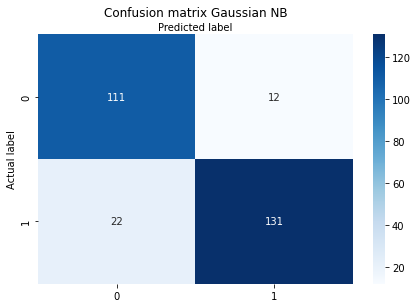

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gaus), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Gaussian NB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

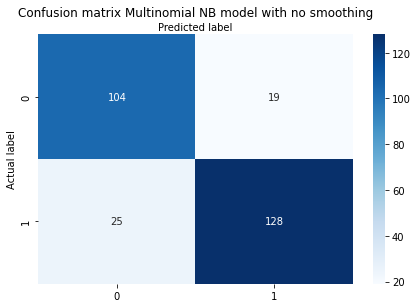

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_mnb_nl), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Multinomial NB model with no smoothing', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

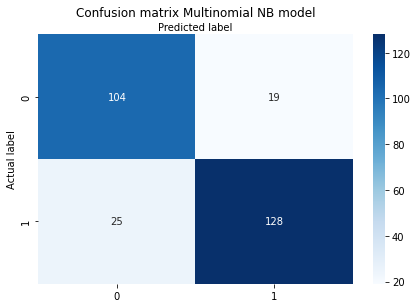

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_mnb), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Multinomial NB model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Text(0.5, 257.44, 'Predicted label')

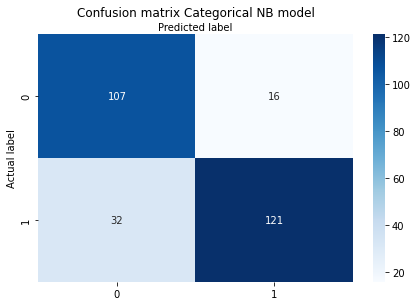

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_cb), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Categorical NB model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

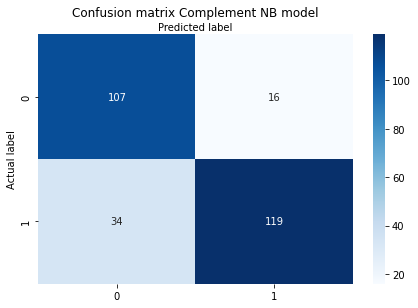

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Complement NB model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

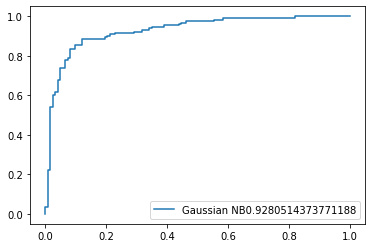

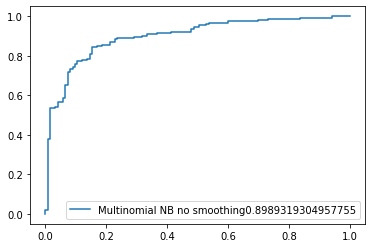

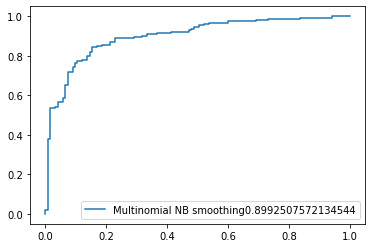

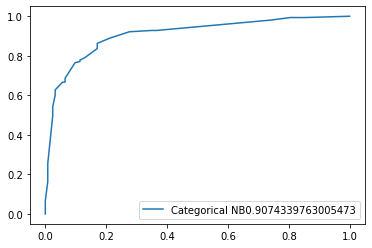

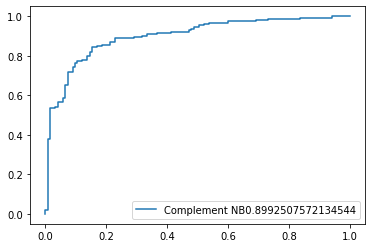

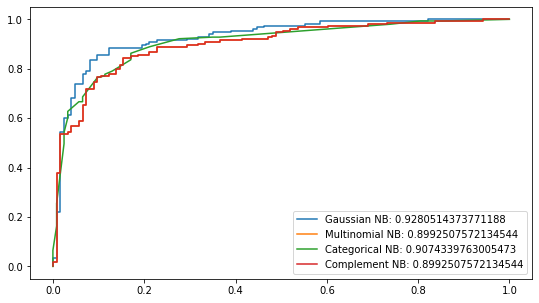

In [ ]:
from matplotlib.legend import Legend
# Compute ROC curve and ROC area for each class
def ROC(fpr_par,tpr_par,legend,auc):
  plt.plot(fpr_par,tpr_par,label=legend+str(auc))
  
  plt.legend(loc=4)
  plt.show()

ROC(fpr_gaus,tpr_gaus,"Gaussian NB",auc_gaus)
ROC(fpr_mnb_nl,tpr_mnb_nl,"Multinomial NB no smoothing",auc_mnb_nl)
ROC(fpr_mnb,tpr_mnb,"Multinomial NB smoothing",auc_mnb)
ROC(fpr_cb,tpr_cb,"Categorical NB",auc_cb)
ROC(fpr_cm,tpr_cm,"Complement NB",auc_cm)

plt.figure(figsize=(9, 5))
plt.plot(fpr_gaus,tpr_gaus,label="Gaussian NB: "+str(auc_gaus))
plt.plot(fpr_mnb,tpr_mnb,label="Multinomial NB: "+str(auc_mnb))
plt.plot(fpr_cb,tpr_cb,label="Categorical NB: "+str(auc_cb))
plt.plot(fpr_cm,tpr_cm,label="Complement NB: "+str(auc_cm))
plt.legend(loc=4)
plt.show()



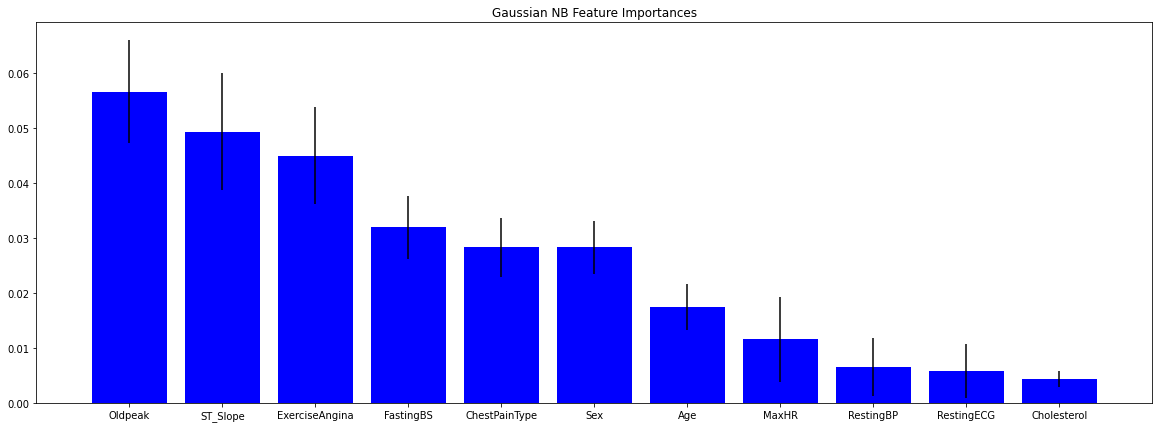

In [ ]:
def F_Importance(importances,test,features,indices,std,title):
  plt.figure(figsize=(20, 7))
  plt.title(title)
  plt.bar(range(test.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
  plt.xticks(range(test.shape[1]), [features[indices[i]] for i in range(11)])
  plt.xlim([-1,test.shape[1]])
  plt.show()

F_Importance(importances_gaus,x_nb_test,x_features,indices_gaus,std_gaus,"Gaussian NB Feature Importances")

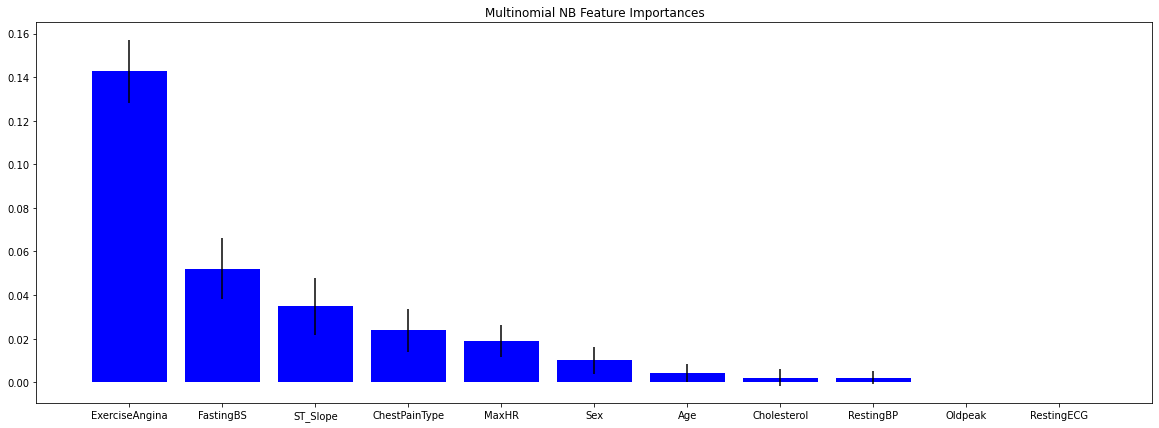

In [ ]:
F_Importance(importances_mnb,x_nb_test,x_features,indices_mnb,std_mnb,"Multinomial NB Feature Importances")

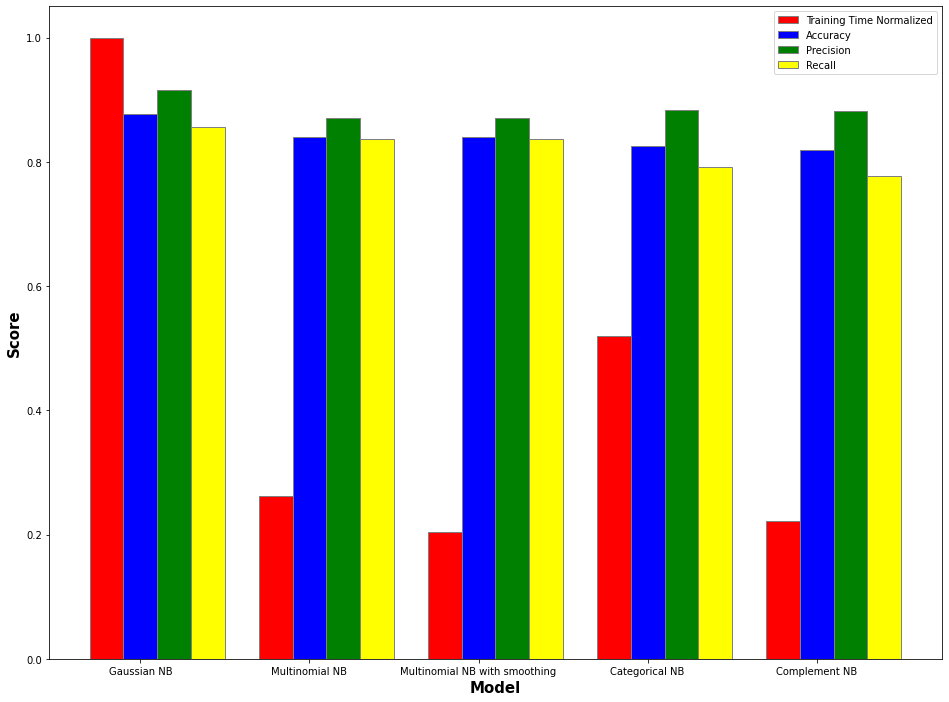

In [ ]:
import matplotlib.pyplot as plt
training_time = np.array(training_time) / np.max(training_time)
training_time = training_time

barWidth = 0.2 # bar width 
fig = plt.subplots(figsize =(16, 12))
 
br1 = np.arange(len(training_time))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, training_time, color ='r', width = barWidth,
        edgecolor ='grey', label ='Training Time Normalized')
plt.bar(br2, accuracy/100, color ='b', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br3, prec, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br4, recall, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Recall')

 
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(training_time))],
        ['Gaussian NB', 'Multinomial NB', 'Multinomial NB with smoothing', 'Categorical NB', 'Complement NB'])
 
plt.legend()
plt.show()

## **SVM**

In [ ]:
from numpy import unravel_index

x_SVM_train = X_train
y_SVM_train = y_train
x_SVM_test = X_test
y_SVM_test = y_test


SVM_classifier = SVC(probability=True)
SVM_classifier.fit(x_SVM_train,y_SVM_train)
y_default_predict = SVM_classifier.predict(x_SVM_test)
accuracy_default_SVM = metrics.accuracy_score(y_SVM_test, y_default_predict)
print('accuracy of default SVM: %',100*accuracy_default_SVM)
prec_default_SVM = metrics.precision_score(y_SVM_test, y_default_predict)
print('precision of default SVM: %',100*prec_default_SVM)
recall_default_SVM = metrics.recall_score(y_SVM_test, y_default_predict)
print('recall of default SVM: %',100*recall_default_SVM)
f1_default_SVM = metrics.f1_score(y_SVM_test, y_default_predict)
print('f1 of default SVM: %',100*f1_default_SVM)



accuracy of default SVM: % 69.92753623188406
precision of default SVM: % 70.83333333333334
recall of default SVM: % 77.77777777777779
f1 of default SVM: % 74.14330218068535


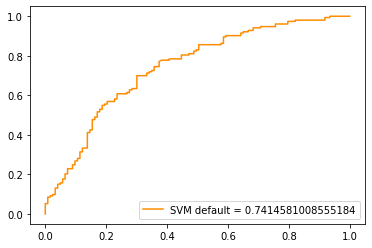

In [ ]:
y_pred_default_SVM_prob = SVM_classifier.predict_proba(x_SVM_test)[::,1] 
fpr_default_SVM, tpr_default_SVM, _ = metrics.roc_curve(y_SVM_test,  y_pred_default_SVM_prob)
auc_SVM = metrics.roc_auc_score(y_SVM_test, y_pred_default_SVM_prob)



plt.plot(fpr_default_SVM,tpr_default_SVM,label="SVM default = "+str(auc_SVM),color='darkorange')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

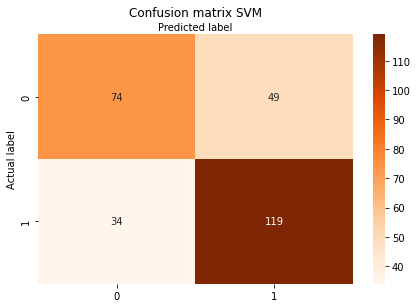

In [ ]:
cm_default_SVM = confusion_matrix(y_SVM_test,y_default_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_default_SVM), annot=True, cmap="Oranges" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
parameters ={"C": [1,2,3,4,5,6,7], 'kernel':['rbf', 'linear','poly','sigmoid']} 
SVM_classifier = SVC(probability=True)
SVM_cv = GridSearchCV(SVM_classifier,parameters,cv=3, verbose = True) 
SVM_cv.fit(x_SVM_train,y_SVM_train)
print("Best Hyperparameters:",SVM_cv.best_params_)
print("The accuracy is:",SVM_cv.best_score_)
print('')
SVM_cv = SVM_cv.best_estimator_
SVM_cv = SVM_cv.fit(x_SVM_train, y_SVM_train)
y_SVM_predict = SVM_cv.predict(X_test)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best Hyperparameters: {'C': 6, 'kernel': 'linear'}
The accuracy is: 0.8457943925233645



In [ ]:
# print("Best Hyperparameters:",SVM_cv.best_params_)
# print("The accuracy is:",SVM_cv.best_score_)
# print('')
# SVM_cv = SVM_cv.best_estimator_
# SVM_cv = SVM_cv.fit(x_SVM_train, y_SVM_train)
# y_SVM_predict = SVM_cv.predict(X_test)

accuracy of  SVM: % 86.23188405797102
precision of  SVM: % 89.1156462585034
recall of  SVM: % 85.62091503267973
f1 of  SVM: % 87.33333333333333


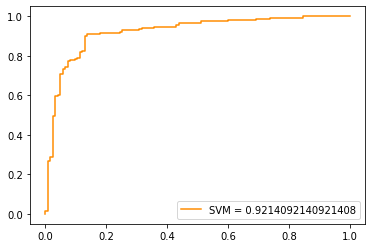

In [ ]:
accuracy_SVM = metrics.accuracy_score(y_SVM_test, y_SVM_predict)
print('accuracy of  SVM: %',100*accuracy_SVM)
prec_SVM = metrics.precision_score(y_SVM_test, y_SVM_predict)
print('precision of  SVM: %',100*prec_SVM)
recall_SVM = metrics.recall_score(y_SVM_test, y_SVM_predict)
print('recall of  SVM: %',100*recall_SVM)
f1_SVM = metrics.f1_score(y_SVM_test, y_SVM_predict)
print('f1 of  SVM: %',100*f1_SVM)

y_pred_SVM_prob = SVM_cv.predict_proba(x_SVM_test)[::,1] 
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_SVM_test,  y_pred_SVM_prob)
auc_SVM = metrics.roc_auc_score(y_SVM_test, y_pred_SVM_prob)



plt.plot(fpr_SVM,tpr_SVM,label="SVM = "+str(auc_SVM),color='darkorange')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

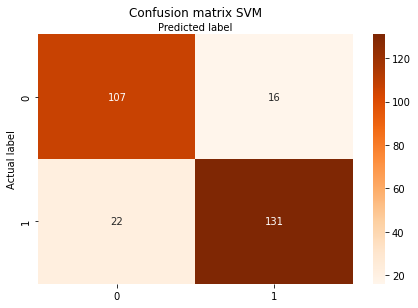

In [ ]:
cm_SVM = confusion_matrix(y_SVM_test,y_SVM_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_SVM), annot=True, cmap="Oranges" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
AlgorithmsScores["SVM"] = [format(f1_SVM, '.3f'), "{:.3f}".format(accuracy_SVM), "{:.3f}".format(recall_SVM), "{:.3f}".format(prec_SVM), "{:.3f}".format(auc_SVM)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.926'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921']}

## **Random Forest**

In [ ]:
#Parameters are:
rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8840579710144928


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       123
           1       0.93      0.86      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



Text(0.5, 427.9555555555555, 'Predicted label')

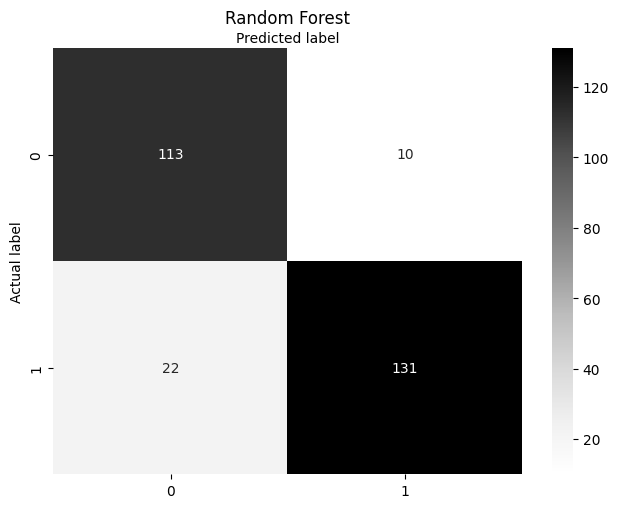

In [ ]:
print(classification_report(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greys" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

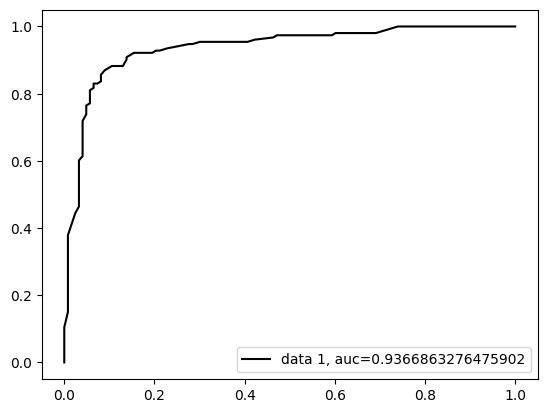

In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_prob_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_rf)
rf_auc = metrics.roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(rf_auc), color = 'black')
plt.legend(loc=4)
plt.show()

In [ ]:
#HyperParameter Tuning: 

parameters ={"max_depth": [2,6,8,10,None], "n_estimators":[20, 50, 70, 100, 150, 200],'criterion':['gini','entropy']} 
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf,parameters,cv=5, verbose = True) 
rf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8, 10, None],
                         'n_estimators': [20, 50, 70, 100, 150, 200]},
             verbose=True)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
The accuracy is: 0.8615067829457363

F1 score:  0.892
Accuracy: 0.891
Recall:  0.882
Precision: 0.918
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       123
           1       0.92      0.88      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



Text(0.5, 427.9555555555555, 'Predicted label')

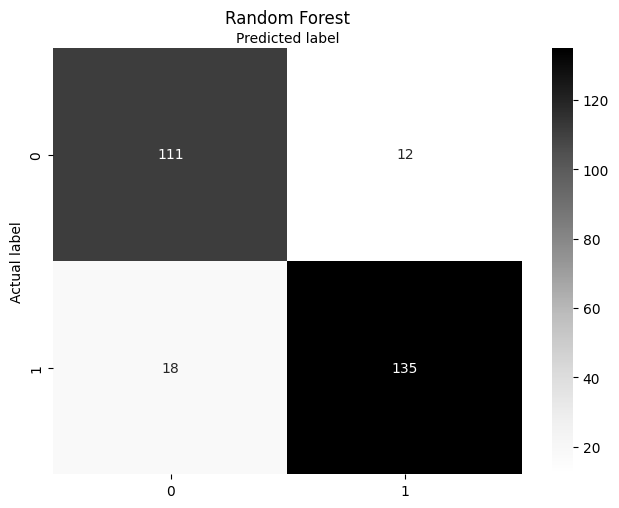

In [ ]:
print("Best Hyperparameters:",rf_cv.best_params_)
print("The accuracy is:",rf_cv.best_score_)
print('')
rf_cv = rf_cv.best_estimator_
rf_cv = rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_test)

rf_f1 = f1_score(y_test,y_pred,average="weighted")
rf_accuracy = rf_cv.score(X_test,y_test)
rf_recall = recall_score(y_test,y_pred,average="binary")
rf_precision = precision_score(y_test,y_pred,average="binary")

print("F1 score:  {:.3f}".format(rf_f1))
print("Accuracy: {:.3f}".format(rf_accuracy))
print("Recall:  {:.3f}".format(rf_recall))
print("Precision: {:.3f}".format(rf_precision))
print(classification_report(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greys" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

#Older CM:

#75-7
#13-89

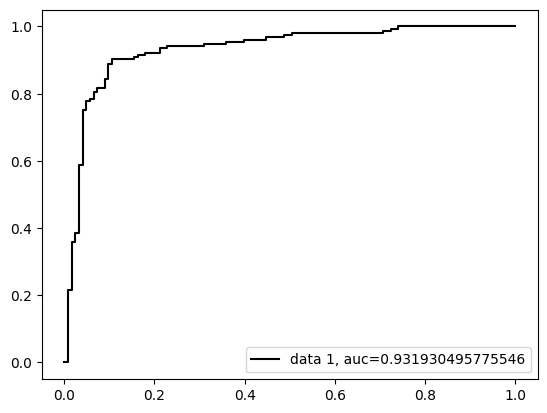

In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_prob_rf_tuned = rf_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_rf_tuned)
rf_cv_auc = metrics.roc_auc_score(y_test, y_pred_prob_rf_tuned)
plt.plot(fpr,tpr,label="data 1, auc="+str(rf_cv_auc), color = "black")
plt.legend(loc=4)
plt.show()



In [ ]:
#F1, Acc, Recall, Precision, AUC.
AlgorithmsScores["Random Forest"] = [format(rf_f1, '.3f'), "{:.3f}".format(rf_accuracy), "{:.3f}".format(rf_recall), "{:.3f}".format(rf_precision), "{:.3f}".format(rf_cv_auc)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.927'],
 'LightGBM': ['0.906', '0.899', '0.882', '0.931', '0.942'],
 'MLP': ['0.846', '0.841', '0.791', '0.910', '0.923'],
 'Random Forest': ['0.892', '0.891', '0.882', '0.918', '0.932'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921'],
 'XGBoost': ['0.895', '0.895', '0.876', '0.931', '0.944']}

## **XGBoost**

In [ ]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 89.13%


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       123
           1       0.92      0.88      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

F1 score:  0.8915
Recall:  0.8824
Precision: 0.9184


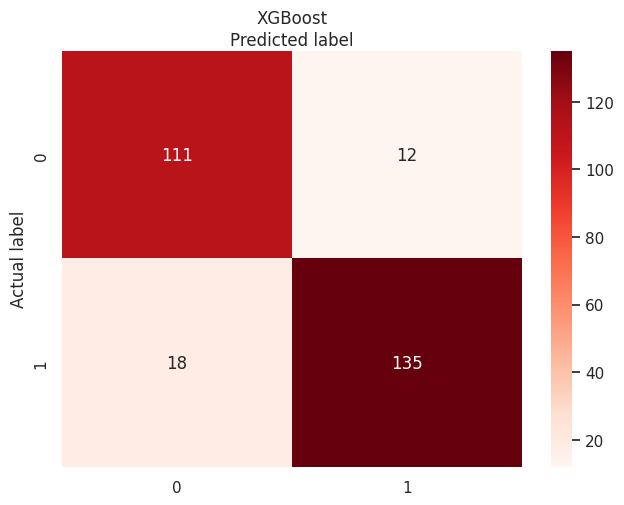

In [ ]:
print(classification_report(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)



class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

xgb_f1 = f1_score(y_test,y_pred,average="weighted")
xgb_recall = recall_score(y_test,y_pred,average="binary")
xgb_precision = precision_score(y_test,y_pred,average="binary")

print("F1 score:  {:.4f}".format(xgb_f1))
print("Recall:  {:.4f}".format(xgb_recall))
print("Precision: {:.4f}".format(xgb_precision))

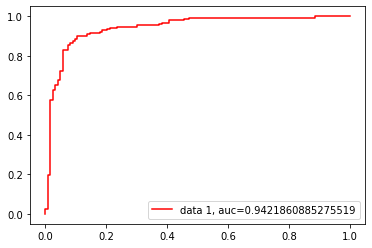

In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_prob_xgb = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_xgb)
xgb_auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(xgb_auc), color = 'red')
plt.legend(loc=4)
plt.show()

In [ ]:
## Hyperparameter tuning

parameters ={"max_depth": [6,3,5,8,10], "eta":[0.3, 0.1, 0.2, 0.4, 0.01, 0.05],'gamma':[0,1], "n_estimator":[10,20,50,100,200]} 
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb,parameters,cv=3, verbose = True) 
xgb_cv.fit(X_train,y_train)


print("Best Hyperparameters:",xgb_cv.best_params_)
print("The accuracy is:",xgb_cv.best_score_)
print('')
xgb_cv = xgb_cv.best_estimator_
xgb_cv = xgb_cv.fit(X_train, y_train)
y_pred = xgb_cv.predict(X_test)

xgb_f1 = f1_score(y_test,y_pred,average="weighted")
xgb_accuracy = xgb_cv.score(X_test,y_test)
xgb_recall = recall_score(y_test,y_pred,average="binary")
xgb_precision = precision_score(y_test,y_pred,average="binary")

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best Hyperparameters: {'eta': 0.3, 'gamma': 1, 'max_depth': 3, 'n_estimator': 10}
The accuracy is: 0.8551401869158878



F1 score:  0.8952
Accuracy: 0.8949
Recall:  0.8758
Precision: 0.9306
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       123
           1       0.92      0.88      0.90       153

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



Text(0.5, 427.9555555555555, 'Predicted label')

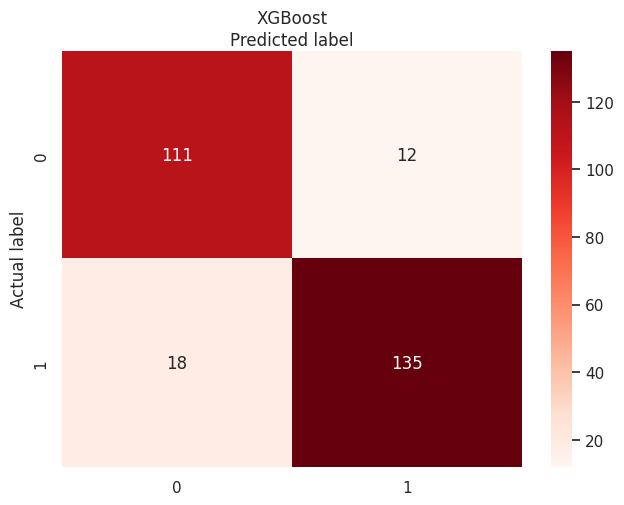

In [ ]:

print("F1 score:  {:.4f}".format(xgb_f1))
print("Accuracy: {:.4f}".format(xgb_accuracy))
print("Recall:  {:.4f}".format(xgb_recall))
print("Precision: {:.4f}".format(xgb_precision))
print(classification_report(y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 


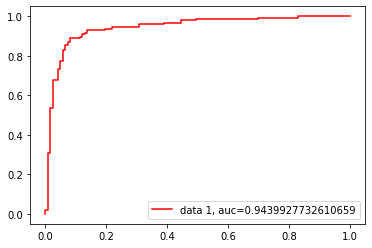

In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_prob_xgb_tuned = xgb_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_xgb_tuned)
xgb_cv_auc = metrics.roc_auc_score(y_test, y_pred_prob_xgb_tuned)
plt.plot(fpr,tpr,label="data 1, auc="+str(xgb_cv_auc), color = "red")
plt.legend(loc=4)
plt.show()


In [ ]:
#F1, Acc, Recall, Precision, AUC.
AlgorithmsScores["XGBoost"] = [format(xgb_f1, '.3f'), "{:.3f}".format(xgb_accuracy), "{:.3f}".format(xgb_recall), "{:.3f}".format(xgb_precision), "{:.3f}".format(xgb_cv_auc)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.926'],
 'Random Forest': ['0.877', '0.877', '0.856', '0.916', '0.932'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921'],
 'XGBoost': ['0.895', '0.895', '0.876', '0.931', '0.944']}

# Multi Layer Perceptron

In [ ]:
x_nn_train = X_train
y_nn_train = y_train
x_nn_test = X_test
y_nn_test = y_test

neural_network_classifier = MLPClassifier(random_state=1, max_iter=300).fit(x_nn_train, y_nn_train)
y_default_nn_predict = neural_network_classifier.predict(x_nn_test)
accuracy_default_nn = metrics.accuracy_score(y_nn_test, y_default_nn_predict)
print('Accuracy of default Neural Network: %',100*accuracy_default_nn)
prec_default_nn = metrics.precision_score(y_nn_test, y_default_nn_predict)
print('Precision of default Neural Network: %',100*prec_default_nn)
recall_default_nn = metrics.recall_score(y_nn_test, y_default_nn_predict)
print('Recall of default Neural Network: %',100*recall_default_nn)
f1_default_nn = metrics.f1_score(y_nn_test, y_default_nn_predict)
print('F1 of default Neural Network: %',100*f1_default_nn)

Accuracy of default Neural Network: % 84.42028985507247
Precision of default Neural Network: % 85.71428571428571
Recall of default Neural Network: % 86.27450980392157
F1 of default Neural Network: % 85.99348534201954


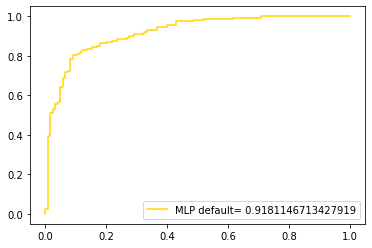

In [ ]:
y_pred_default_nn_prob = neural_network_classifier.predict_proba(x_nn_test)[::,1] 
fpr_default_nn, tpr_default_nn, _ = metrics.roc_curve(y_nn_test,  y_pred_default_nn_prob)
auc_nn = metrics.roc_auc_score(y_nn_test, y_pred_default_nn_prob)

plt.plot(fpr_default_nn,tpr_default_nn,label="MLP default= "+str(auc_nn),color='gold')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

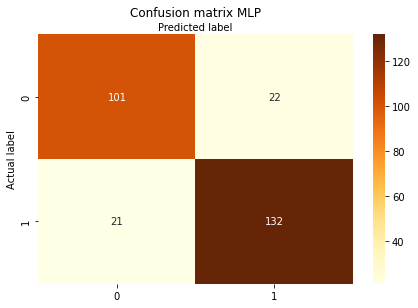

In [ ]:
cm_default_nn = confusion_matrix(y_nn_test,y_default_nn_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_default_nn), annot=True, cmap="YlOrBr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
parameters ={'hidden_layer_sizes': [100,110,120], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['sgd', 'adam']} 
neural_network_classifier = MLPClassifier(random_state=1, max_iter=800)
nn_cv = GridSearchCV(neural_network_classifier,parameters,cv=5, verbose = True) 
nn_cv.fit(x_nn_train,y_nn_train)
print("Best Hyperparameters:",nn_cv.best_params_)
print("The accuracy is:",nn_cv.best_score_)
print('')
nn_cv = nn_cv.best_estimator_
nn_cv = nn_cv.fit(x_nn_train, y_nn_train)
y_nn_predict = nn_cv.predict(x_nn_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'activation': 'logistic', 'hidden_layer_sizes': 110, 'solver': 'adam'}
The accuracy is: 0.8287427325581396



Accuracy of Neural Network: % 84.05797101449275
Precision of Neural Network: % 90.97744360902256
Recall of Neural Network: % 79.08496732026144
F1 of Neural Network: % 84.61538461538461


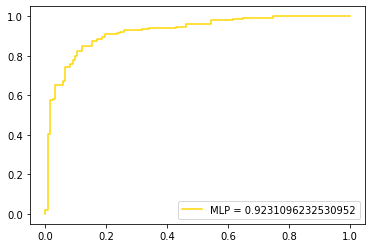

In [ ]:
accuracy_nn = metrics.accuracy_score(y_nn_test, y_nn_predict)
print('Accuracy of Neural Network: %',100*accuracy_nn)
prec_nn = metrics.precision_score(y_nn_test, y_nn_predict)
print('Precision of Neural Network: %',100*prec_nn)
recall_nn = metrics.recall_score(y_nn_test, y_nn_predict)
print('Recall of Neural Network: %',100*recall_nn)
f1_nn = metrics.f1_score(y_nn_test, y_nn_predict)
print('F1 of Neural Network: %',100*f1_nn)

y_pred_nn_prob = nn_cv.predict_proba(x_nn_test)[::,1] 
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_nn_test,  y_pred_nn_prob)
auc_nn = metrics.roc_auc_score(y_nn_test, y_pred_nn_prob)

plt.plot(fpr_nn,tpr_nn,label="MLP = "+str(auc_nn),color='gold')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

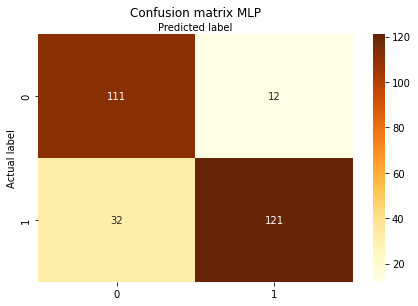

In [ ]:
cm_nn = confusion_matrix(y_nn_test,y_nn_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_nn), annot=True, cmap="YlOrBr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
AlgorithmsScores["MLP"] = [format(f1_nn, '.3f'), "{:.3f}".format(accuracy_nn), "{:.3f}".format(recall_nn), "{:.3f}".format(prec_nn), "{:.3f}".format(auc_nn)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.926'],
 'MLP': ['0.846', '0.841', '0.791', '0.910', '0.923'],
 'Random Forest': ['0.877', '0.877', '0.856', '0.916', '0.932'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921'],
 'XGBoost': ['0.895', '0.895', '0.876', '0.931', '0.944']}

#LightGBM

In [ ]:
x_L_train = X_train
y_L_train = y_train
x_L_test = X_test
y_L_test = y_test

lb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lb.fit(x_L_train, y_L_train)


y_default_L_predict = lb.predict(x_L_test)

accuracy_default_lb = metrics.accuracy_score(y_L_test, y_default_L_predict)
print('Accuracy of default LightGBM: %',100*accuracy_default_lb)
prec_default_lb = metrics.precision_score(y_L_test, y_default_L_predict)
print('Precision of default LightGBM: %',100*prec_default_lb)
recall_default_lb = metrics.recall_score(y_L_test, y_default_L_predict)
print('Recall of default LightGBM: %',100*recall_default_lb)
f1_default_lb = metrics.f1_score(y_L_test, y_default_L_predict)
print('F1 of default LightGBM: %',100*f1_default_lb)


Accuracy of default LightGBM: % 88.40579710144928
Precision of default LightGBM: % 92.90780141843972
Recall of default LightGBM: % 85.62091503267973
F1 of default LightGBM: % 89.1156462585034


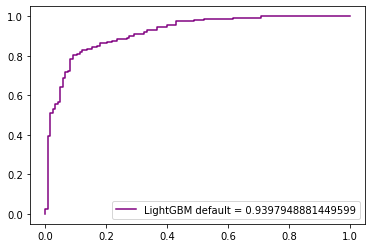

In [ ]:
y_pred_default_L_prob = lb.predict_proba(x_L_test)[::,1] 
fpr_default_L, tpr_default_L, _ = metrics.roc_curve(y_L_test,  y_pred_default_L_prob)
auc_L = metrics.roc_auc_score(y_L_test, y_pred_default_L_prob)

plt.plot(fpr_default_nn,tpr_default_nn,label="LightGBM default = "+str(auc_L),color='purple')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

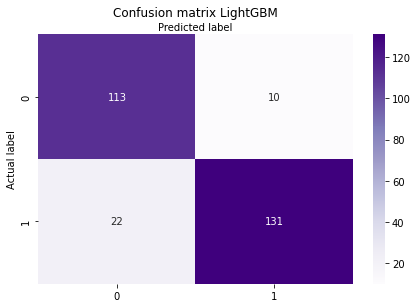

In [ ]:
cm_default_L = confusion_matrix(y_L_test,y_default_L_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_default_L), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LightGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
parameters ={'num_leaves ': [40,50,60,70,700], 'min_data_in_leaf ':[100,200,500,700], 'max_depth':[7,8,9]} 
lb_cv = GridSearchCV(lb,parameters,cv=5, verbose = True) 
lb_cv.fit(x_L_train,y_L_train)
print("Best Hyperparameters:",lb_cv.best_params_)
print("The accuracy is:",lb_cv.best_score_)
print('')
lb_cv = lb_cv.best_estimator_
lb_cv = lb_cv.fit(x_L_train, y_L_train)
y_L_predict = lb_cv.predict(x_L_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'max_depth': 9, 'min_data_in_leaf ': 100, 'num_leaves ': 40}
The accuracy is: 0.8443192829457364



Accuracy of LightGBM: % 89.85507246376811
Precision of LightGBM: % 93.10344827586206
Recall of LightGBM: % 88.23529411764706
F1 of LightGBM: % 90.60402684563759


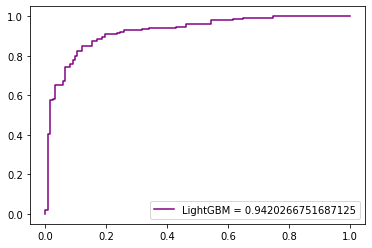

In [ ]:
accuracy_lb = metrics.accuracy_score(y_L_test, y_L_predict)
print('Accuracy of LightGBM: %',100*accuracy_lb)
prec_lb = metrics.precision_score(y_L_test, y_L_predict)
print('Precision of LightGBM: %',100*prec_lb)
recall_lb = metrics.recall_score(y_L_test, y_L_predict)
print('Recall of LightGBM: %',100*recall_lb)
f1_lb = metrics.f1_score(y_L_test, y_L_predict)
print('F1 of LightGBM: %',100*f1_lb)

y_pred_L_prob = lb_cv.predict_proba(x_L_test)[::,1] 
fpr_L, tpr_L, _ = metrics.roc_curve(y_L_test,  y_pred_L_prob)
auc_L = metrics.roc_auc_score(y_L_test, y_pred_L_prob)

plt.plot(fpr_nn,tpr_nn,label="LightGBM = "+str(auc_L),color='purple')
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

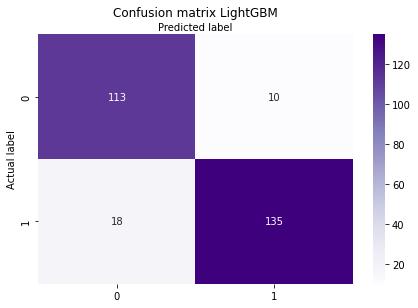

In [ ]:
cm_L = confusion_matrix(y_L_test,y_L_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cm_L), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LightGBM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
AlgorithmsScores["LightGBM"] = [format(f1_lb, '.3f'), "{:.3f}".format(accuracy_lb), "{:.3f}".format(recall_lb), "{:.3f}".format(prec_lb), "{:.3f}".format(auc_L)]
AlgorithmsScores

{'Gaussian NB': ['0.877', '0.877', '0.856', '0.916', '0.928'],
 'LR': ['0.859', '0.859', '0.843', '0.896', '0.926'],
 'LightGBM': ['0.906', '0.899', '0.882', '0.931', '0.942'],
 'MLP': ['0.846', '0.841', '0.791', '0.910', '0.923'],
 'Random Forest': ['0.877', '0.877', '0.856', '0.916', '0.932'],
 'SVM': ['0.873', '0.862', '0.856', '0.891', '0.921'],
 'XGBoost': ['0.895', '0.895', '0.876', '0.931', '0.944']}

# **Comparison**

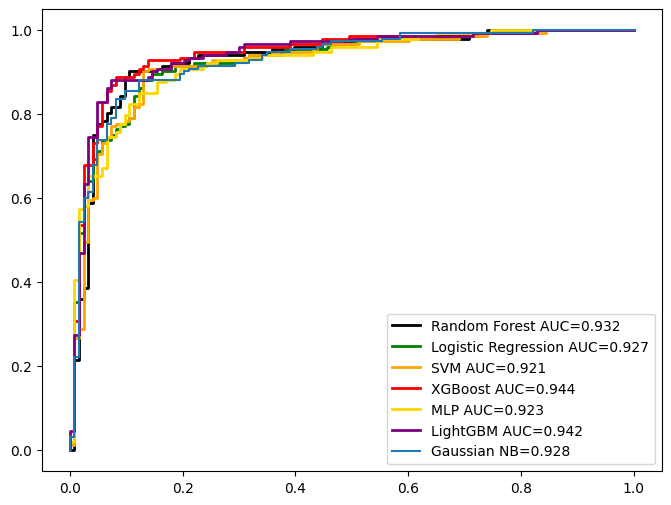

No handles with labels found to put in legend.


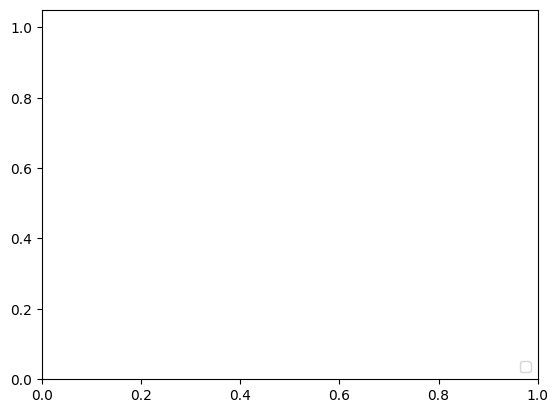

In [ ]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.style.use('default')
plt.figure(figsize=(8, 6))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_rf_tuned)
plt.plot(fpr, tpr, color='black', lw=2,
         label='Random Forest AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_lr_cv)
plt.plot(fpr, tpr, color='green', lw=2,
         label='Logistic Regression AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_SVM_prob)
plt.plot(fpr, tpr, color='orange', lw=2,
          label='SVM AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_prob_xgb_tuned)
plt.plot(fpr, tpr, color='red', lw=2,
          label='XGBoost AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_nn_prob)
plt.plot(fpr, tpr, color='gold', lw=2,
          label='MLP AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_pred_L_prob)
plt.plot(fpr, tpr, color='purple', lw=2,
          label='LightGBM AUC={0:.3f}'.format(roc_auc))
ROC(fpr_gaus,tpr_gaus,"Gaussian NB=",'{0:.3f}'.format(auc_gaus))
#plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


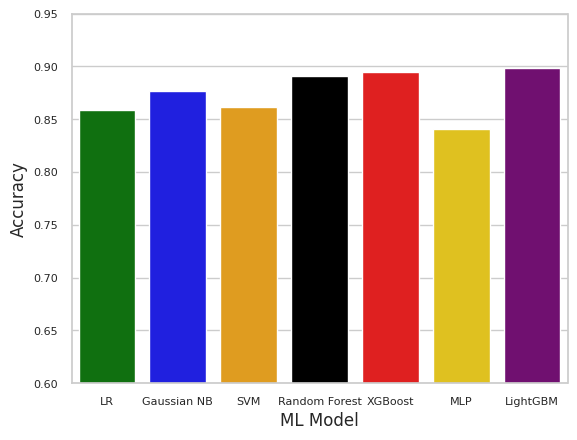

In [ ]:
sns.set_style('darkgrid')
x=[]
y=[]
colors = ["green", "blue", "orange", "black", "red", "gold", "purple"]
plt.style.use('default')
sns.set(style="whitegrid")
#plt.xticks(rotation=90)

plt.tick_params(labelsize=8)
plt.ylim(0.6, 0.95)
for i in range(len(list(AlgorithmsScores.keys()))):
  x.append(str(list(AlgorithmsScores.keys())[i]))
  y.append(float(AlgorithmsScores[str(list(AlgorithmsScores.keys())[i])][1]))
# print(x)
# print(y)
plot = sns.barplot(x,y, palette=colors)
plot.set_xlabel("ML Model",fontsize=12)
plot.set_ylabel("Accuracy",fontsize=12)
plt.show()